# מציאת תת-הרצף המשותף הארוך ביותר: Longest common subsequence (LCS)

## הגדרת תת-רצף

B הוא תת-רצף (subsequence) של A אם ניתן לגזור את B מ־A על ידי <span style='color:red'>הסרה</span> של איברים מתוך A.  

דוגמאות עם רשימות:  
- [2,4,6] היא תת־רצף של [<span style='color:red'>1</span>,2,<span style='color:red'>3</span>,4,<span style='color:red'>5</span>,6]  
- [6,4,2] איננה תת־רצף של [1,2,3,4,5,6] (יש חשיבות לסדר)  

דוגמאות עם מחרוזות:  
- 'is' היא תת־רצף של ='<span style='color:red'>d</span>is<span style='color:red'>tance</span>'  
- 'nice' איננה תת־רצף של 'distance'  


בהנתן שתי סדרות (מחרוזות או רשימות), נרצה למצוא את תת־הרצף המשותף הארוך ביותר (Longest Common Subsequence – LCS).

**דוגמא 1:** "ABCD" ו־"ACBAD" מכילות:  
    - ארבעה תתי־רצף משותפים באורך 1: "A", "B", "C", "D"  
    - חמישה תתי־רצף משותפים  באורך 2: "AB", "AC", "AD", "BD", "CD"  
    - שני תתי־רצף משותפים באורך 3: "ABD", "ACD"  
    - אפס תתי־רצף משותפים באורך 4.  
 לכן, ה־LCS הוא "ABD" או "ACD"  

**דוגמא 2:** "HUMAN" ו־"CHIMPANZEE" מכילות:
    - ארבעה תתי רצף משותפים באורך 1: "H", "M", "A", "N"\
    - הרצף "HMAN" הוא תת רצף משותף. וגם ה-LCS.

```{admonition} **מעניין לדעת**  
:class: info

מציאת תתי רצפים משותפים היא משימה שימושית מאוד בפתרון מגוון בעיות, בין השאר ביישומים ביואינפורמטיים ובבקרת גרסאות (למשל *git*)

```

In [ ]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מהו הLCS עבור המחרוזות 'meow', 'homeownwer'?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "''",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "'mow'",
                "correct": false,
                "feedback": "לא נכון"
            },
            { 
                "answer": "'omeowwe'",
                "correct": false,
                "feedback": "לא נכון"

            },
            { 
                "answer": "'meow'",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

In [ ]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מהו הLCS עבור המחרוזות 'meow', 'cat'?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "'m'",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "'a'",
                "correct": false,
                "feedback": "לא נכון"
            },
            { 
                "answer": "'meow'",
                "correct": false,
                "feedback": "לא נכון"

            },
            { 
                "answer": "''",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

### גישה רקורסיבית למציאת LCS

נפרק את הבעיה לתתי-בעיות פשוטות יותר.   

נבחן את התו האחרון של שני הרצפים, למשל:  
    - "ABC<span style='color:blue'>D</span>" ו־"ACBA<span style='color:blue'>D</span>"  
    - "HUMA<span style='color:green'>N</span>" ו־"CHIMPANZE<span style='color:green'>E</span>"  


אם התווים האחרונים של הרצפים הם **זהים**, הם חלק מ־LCS, כיוון שניתן להוסיף אותם ל־LCS של שאר הרצפים. לדוגמה:  
    - `"ABCD" == "ABC" + "D"`  
    - `"ACBAD" == "ACBA" + "D"`  
    - `"LCS("ABCD", "ACBAD") == LCS("ABC", "ACBA") + "D`

אחרת, כלומר שני התווים האחרונים **שונים** (כלומר last_1 ו־last_2). במקרה זה לא ייתכן ששניהם יהיו חלק מה-LCS - אם שניהם בLCS, מי מהם הוא התו האחרון? last_1 או last_2?  

לכן יש לנו 3 אפשרויות לגבי last_1 ו־last_2:  
- רק last_1 הוא חלק מה־LCS:  
    - LCS("HUMA<span style='color:blue'>N</span>","CHIMPANZE<span style='color:red'>E</span>") = LCS("HUMAN","CHIMPANZE")  
- רק last_2 הוא חלק מה־LCS:  
    - LCS("HUMA<span style='color:red'>N</span>","CHIMPANZE<span style='color:blue'>E</span>") = LCS("HUMA","CHIMPANZEE")  
- אף אחד מהם אינו חלק מה־LCS:  
    - LCS("HUMA<span style='color:red'>N</span>","CHIMPANZE<span style='color:red'>E</span>") = LCS("HUMA","CHIMPANZE")  



### פסאודו-קוד

כעת נכתוב פסאודו קוד לבעיה "מהו **אורך** ה-LCS בין שתי מחרוזות".

לשם כך נגדיר לכל רצף `x`:  
- `last_x`: התו האחרון של `x`  
- `prefix_x`: כל התווים שלפני `last_x`

ובאופן דומה נגדיר עבור הרצף `y` את `last_y` ו-`prefix_y`



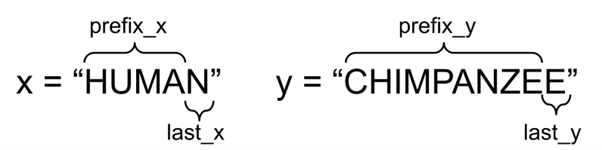

In [4]:
%%html
<img width=800 height=200 src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAloAAACWCAYAAAAG7iYMAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAF2ISURBVHhe7d11XFTZ/z/w18AMjSIoYYIoYisWJiogKtZa67p+1nWNtbtj1VURc621u2stREKxMLGwFVRAQECRrsn374/fzP0ylxwEBT3Px+M+drnnfQ7DOPfMufeUgIgIDMMwDMMwTLHT4p9gGIZhGIZhigdraDEMwzAMw5QQ1tBiGIZhGIYpIayhxTAMwzAMU0JYQ4thGIZhGKaEsIYWwzAMwzBMCWENLYZhGIZhmBLCGloMwzAMwzAlhDW0GIZhGIZhSghraDEMwzAMw5QQ1tBiGIZhGIYpIayhxTAMwzAMU0JYQ4thGIZhGKaEsIYWwzAMwzBMCWENLYZhGIZhmBIiICLin2S+b58+fUJycjL09PRQsWJFiEQiEBGEQiE/lGEYptRLTEzE58+foaOjg0qVKkFHRwdEBG1tbQgEAn44w3xVrKH1A0lPT8eqVatw7tw5fP78GVWrVsWECRPg7+8PqVSKrVu3wtDQkJ+NYRimVJLL5di6dSv279+PuLg4GBoaYt68eQgMDMSHDx+wbt062NjY8LMxzFfFug5/IAcOHMDixYvx6NEjGBoawtTUFESEEydO4OzZs5BKpfwsDMMwpZaPjw+mT5+OoKAg6OnpwcTEBABw/vx5nDt3DgkJCfwsDPPVsYbWD+TSpUsAgKVLl+LFixfw8vKCq6srlixZAg8PD+jr6/OzMAzDlFpPnz5FVlYWRo0ahSdPnuDmzZvo2bMn5s2bB09PT1SrVo2fhWG+OtbQ+oFkZWVBIBCgVatW3LmKFSti8uTJGD9+PHR1ddXiGYZhSjO5XA4A6NixI3R0dAAAxsbGGD16NGbNmgVzc3NejvyxkTRMSdBetGjRIv5JpvjFxsZi7969UCgU0NXVxZ49e7BixQqcOnUK8fHxqFatGoyMjLj4zMxMnDp1CqGhoTA1NcW2bduwdetWxMTEoGbNmjAwMAAARERE4OjRo1i3bh0OHDiAZ8+eQV9fX+1O7smTJzhy5AguXrzIDRiNiIiAtrY2jIyMcOzYMTx9+hR169aFXC7H8ePHcenSJYhEIlSuXJkrBwCCg4Nx+PBhREZGwt7eHlpamrXVb9++jcOHDyM6Ohp169ZVy5+QkIAjR47gxo0bqFy5MsqXL6+Wl2GY0iM1NRWHDh1CfHw8KlasiOPHj8PT05OrHywtLVGhQgUunohw9uxZPH78GObm5jhy5Aj++ecfhIaGwtraGuXKlQOUk3X+++8/rF+/Hnv27EFQUBC0tLRQvXp1aGtrAwDevn2LY8eOwd/fH2/fvoWOjg7ev38PqVSKihUr4vTp07h16xZq1qwJPT09XLhwAefOnUN6ejpsbW2516Qq68iRI3j58iVsbGygp6enll6Q69ev48yZM9DV1YWVlRU/GVFRUWp1Jhuc/wMi5qu4fv06ASAXFxdq164diUQiatCgAVWpUoUAkKOjIz158oSLj4uLo/r165O9vT316tWLABAA0tXVpUePHhERkY+PD9WpU4cAkIWFBdnY2JBQKCShUEh///03ZWVlERHRrl27yNTUlEQiEQEgY2NjqlixIv3777/05s0bsrCwoGrVqlFycjIREXl6ehIAqlu3LkVERHCvKTIykpo2bUoAaP369dx5Tdy6dYsqVKhAIpGIDh8+zJ2XyWQ0efJkAkDu7u4UHx+vlo9hmNIlPDycKlWqRA4ODtS7d28SCoVUp04dqlmzJgEge3t7unr1Khcvk8nIycmJbGxs6Pfff+fqNAB05swZIiK6f/8+OTo6EgAyMzMjGxsbMjAwIAA0evRoSkpKIiIib29vql69Ounp6REAMjIyIhMTE1q4cCFFRUWRvb096erqUnBwMBERHTlyhEQiEVlZWdGdO3e415SSkkLdunUjADR16lQSi8VcWmHt3buXAFDPnj0pIyODn0wrV64kADRlyhR+EvODYA2tryQwMJC0tbUJAFlbW9OZM2coKiqKnj17RhMnTiQA1KlTJ66xExcXRw4ODiQUCsnAwIDmzJlDmzdvpjVr1pBCoaCHDx+SpaUl6ejokKenJwUHB1NISAhduHCBmjVrRgBo8+bNXFl37tyh1q1bk0AgoDVr1tDdu3cpNjaWXr58SZaWllS9enWuEktPT6c+ffoQAPrzzz+5v+GPP/4gADR06FCuEVcUW7ZsIQBkZ2dH7969IyKio0ePkkgkopo1a9KrV6/4WRiGKWUiIiLI2tqaAFDFihVpx44dFBYWRiEhIbR06VICQPXq1eNu1mQyGXXt2pWEQiEZGRnRqFGjaPv27eTp6Unx8fEUHh5OjRo1IgA0bdo0un//PoWEhNC1a9fIzc2NO69QKCghIYHu379Pw4cPJwD0119/0a1bt+j9+/f04cMHqlOnDunr63M3pQqFgruR69q1K6WkpBARca/TycmpyDd34eHhZGNjQ3p6evTgwQO1tOTkZOrYsSPp6OhQUFCQWhrz42ANra8kMDCQtLS0SCgU0tmzZ9XSJBIJderUiQBwT3k+fvzINZhmzJihFk9ENGzYMAJAixcv5ifRw4cPSV9fn+zt7SkyMpI737NnTxIIBBQQEMCde/HiBVWuXJmsra25hpbqvI2NDQGg8+fP06FDhwgANW3alN6/f8/FFYVUKqUhQ4YQAJowYQIFBwdTrVq1SEtLi06fPs0PZximFHr//j3VqFGDkMcT7tGjRxMAWrNmDRERyeVy6t69OwGgwYMHk0wmU4tXPUkfPXq02nlSPk23s7OjChUqcE+piIg8PDwIAB09epQ7Fx0dTfb29mRoaKgWGxMTQ61btyYAtGXLFgoICCBDQ0OysrLK0UDS1PTp0wkALV++XO38lStXSFdXlzp37vxFN6dM2abZABvmiygUCjRr1gyurq5q50UiEfr27QsACAwMBAAIBAIoFAoIBAIMGjRILT4qKgp37tyBnp4eevToAYlEgoyMDGRkZCAzMxO2trZo2bIlXr16hadPn3L5ZDIZoBz/VZC6deti4cKFEAqFmDJlCubPn49y5cph1apVXzyTRygU4u+//0bdunWxbds2jBw5Em/evMHMmTPRu3dvfjjDMKVUVlYWbG1tc71uu3btCiiXYJDL5RAIBNzgdVdXV268FZTjvc6fPw8AcHNzg1wu5+q0jIwMWFlZoXnz5khMTIS/vz+XTyKRAMrXURBLS0t4eHjA1NQUCxcuxLhx4yCVSuHh4QEHBwd+uEZcXV0hEolw8uRJpKenA8r6/tKlSxCLxRg8eDCbbPQDYw2tr8ze3j7XC041QDMiIgIAoKWlBYVCAX19fW6QqEpUVBRiY2Mhk8kwbtw4uLi4wM3NjTvc3d3x7NkzAMCHDx/U8mrit99+w5gxYxAaGoqwsDD8/fffcHZ25ocViY2NDVatWgUDAwPcu3cP3bp1w7x589hAUYYpI4gIcrkcNWvWhKWlJT8Zpqam0NHRQWRkJFJTU9VuHk1NTdViU1JSuLpq4cKFcHZ2VqvTnJ2dueVpIiMj1fJqomPHjpg9ezY+fvyIV69eYdSoUfjtt9/4YRpr3bo1WrdujeDgYNy5cwdQDuo/ceIELC0t0bFjR34W5gfCGlpfma6ubq6NCdXUZNVTJ1WMjo5OjnixWIzMzExoaWkhMzMTaWlpSE1NRWpqKlJSUpCamoratWvD0dFR4+nN2QkEArVZQ6q70eJiYmLC3dUqFAqNZzAyDPPtiUSiHHUUAGhra0NbWxtyuZyr16C8icz+NAvKek8qlUJLSwsSiYSrx1RHUlISbGxs0KpVK9SqVUstr6ayz2YurnrH2NgY3bt3h1wuh5eXFwDg7t27CAkJgbu7O2rWrMnPwvxAvvwTxmgkLS0t17VaPn/+DCjvAlFAo8bIyAi6urowMzPDpUuX8PDhQzx48IA7Hj16hNu3b+P27dvo2bMnP3uhXbp0CZs2bYKVlRUsLS3h6enJdW1+qYSEBMyfPx/JycmoW7cu/Pz8sGLFilzfG4ZhSq+srKxc66uMjAyIxWIYGxvD2NiYn6xGR0cHQqEQQqEQe/bsyVGnPXjwAHfu3MGdO3cwceJEfvZCe/78OdauXQtjY2PUqFEDO3bswKFDh/hhRdK7d2+YmJjg5s2bSE5Ohre3N4RCIbp27ZprQ5T5cbCG1lcWHByM1NRU/mncunULANCwYUNA+Vg+L9bW1qhVqxY+ffrEjcFS3T2qNlFds2YNZsyYgdDQUH72Qvnw4QNmzpyJhIQErFu3Dh4eHvj06ROmT5+OmJgYfrjGPD09cfXqVQwZMgSHDh1CzZo1sXLlSvj4+PBDGYYphQQCAUQiEV68eIF3797xk/H27VsoFAq0bNkSurq6+dZpFSpUQL169SCRSPDmzRuAV6dpa2tj3759mDx5Mm7cuMHPXihpaWmYP38+Xr9+jXnz5mHLli0QCoWYO3cuXr58yQ/XmJ2dHZydnfH06VOcPHkSt27dQv369dGpUyd+KPODYQ2tr0hbWxsvXrzAjh071M7fvHkTR44cQYUKFdCtWzeggIaWmZkZunbtCplMBk9PT8TFxamlHzlyBNOnT8eOHTu4waKaICJ4enri0aNHGDx4MAYOHIjffvsNvXv3RlBQEFatWsXPopGzZ89i7dq1sLGxwcyZM9G0aVPMmTMHWVlZmDdv3heNK2MY5uvR1dVFbGwsduzYobZX6qtXr7B582ZoaWlhwIABgLKbLi96enpc3KpVq/D8+XO19CtXrmDixIlYv349MjIy1NIKa8uWLThz5gw6duyI0aNHo1u3bhgzZgzev3+PuXPnFmpAfX60tLQwePBgSCQSrFu3DmFhYXB1dYWZmRk/lPnR8KchMiUjMDCQRCIR6erqkp6eHo0bN45OnDhBq1evpurVq5NAIKCVK1dy8bGxsVS/fn0yNDSk0NBQtbJU6c7OzgTlYqdbt26lEydO0KxZs8jAwIAEAgFt2rRJLY+rqysBoHPnznHnnj9/TpUqVaKqVatyyzvs27ePAFDNmjXp7du3XOyTJ0/IwsKCtLS06NixY9x5Tbx584Zq165NAGjnzp3c+YyMDBowYAABoD/++IPS09PV8jEMU7q8f/+erK2tSVdXl0QiEQ0aNIiOHDlC//77LzVu3JigXPdKtQioTCbjlrHJXgepJCUlccu+2NnZ0erVq+nEiRO0ZMkSqlq1KleeVCrl8ixYsIAA0O7du7lzUVFRZGtrSzo6Otw6WgEBAVS+fHkyNjZWW0Q1OjqaW4R5xYoVOZac0FRsbCz3t5uZmdG9e/f4IcwPiDW0vpLAwEASCATk5OREM2fOpHLlyhGUqyLb2trS1q1b1S7yT58+UadOnah27doUFhamVpZKeHg4jRkzRq0sANSgQQPatWuXWoVERPTLL7+QhYUF+fv7c+dev35NjRo1oubNm1NmZiZFR0dTmzZtyNzcnA4cOKCWn4ho27ZtZGJiQk5OTvThwwd+cr6ysrJo5syZpKenR8OGDcuxCvPz58+pfv36VLFixRxrjTEMU7q8f/+eLCwsqEmTJvT3339zjSEAZGlpSUuXLuUWBiVlQ2vAgAFkZWVFFy9eVCtL5dOnT7RgwQJuxwzVUb16dVq+fDmlpaWpxa9evZpMTEzU1tGKjY2ltm3bkrW1NYWEhFBSUhL169ePTExMyMPDQy0/ZVtlvl69elzDrKgUCgUtXLiQoFwYVSKR8EOYH5CA8uujYorNjRs30L59e/Tq1QsnTpxAREQEYmJiIBQKUaVKFdSoUUMtXiaTcXt32djYcLMS+YgIr169QlJSEsRiMQwMDFC5cmVUrVqVH4r3798jPT1dbV9FsViM9+/fQyAQoFatWkhNTUV4eDhEIhFsbW0hEonUypBKpQgJCYFCoYC1tXWBg1yzk8lkePfuHbKyslC9enWYmJjwQ/D+/XvEx8fD0tIyxz6LDMOUHpGRkXBwcECtWrXg4+OD1NRUhIWFQSAQwMrKKsfsQCJCZGRkjjooN2/fvsWnT5+QlZUFPT09mJub5zpz79OnT4iNjUX16tW52YQymQwRERGQyWSoWbMmFAoF3rx5A4FAwO19yPfmzRukpaWhevXqOZae0NTKlSsxa9YsbNu2DaNGjeInMz8g1tD6SlQNrW7duuHcuXMQCoX8EIZhmDJD1dCysbGBr6/vFzdQvgeJiYno3LkzPn78iBs3bsDGxoYfwvyAWEPrKwkMDESHDh3g5uaGs2fP5rpoaVlCRIiPj0dWVlahpi4TEYRCISpWrJjjKRnDMGVPZGQkGjdujJo1a8LX1xcVK1bkh5Q5iYmJSEtLK1SdBuUuF7q6unjy5AnS0tJw7NgxHDhwALNmzYKHh0exrNHFlH2sofWVqBpaXbt2xZkzZ8p8Qys9PR2jR4/GzZs3C/V0TiaToUqVKti+fTvq1q3LT2YYpoyJjIxEkyZNuCda30NDa8aMGfjvv/+4ZXLyI5fLUa5cOSxbtgy7du3CqVOnAAAdOnTAwYMHv3irMub7wRpaX0lUVBQOHjwIW1tb9O3bN8fKyGWNWCzG4cOH8ebNm0I3tCpUqIAhQ4bkul0HwzBlS0pKCvbu3QsTExMMGDAA+vr6/JAy57///sPDhw8L1dBSKBTQ1dXFwIEDcePGDRw7dgz169fHmDFjULt2bX448wNjDS2GYRiGYZgSwjqQGYZhGIZhSghraDEMwzAMw5QQ1tBiciWTyfLdBohhGKYsEYvFkMlk/NMMU+JYQ4vJISYmBn369MG2bdtYY4thmDIvMzMTw4cPx5w5c1idxnx1rKHF5BAWFgZvb2+cPXsWmZmZ/GSGYZgyJSYmBmfOnMH58+eRlJTET2aYEsUaWkwOMTExAIC0tDRIJBJ+MsMwTJny7t07iMViyOVypKSk8JMZpkSxhhaTQ3BwMKDc/4vd/TEMU9a9ePECMpkM0dHReP36NT+ZYUoUa2gxatLS0uDj4wMAiI2NxYULF/ghDMMwZYZUKsWdO3cAABkZGbhy5Qo/hGFKFFuwlFGzZcsWjB8/Hra2tkhKSoKJiQkCAwNhYWHBD2UYhin1/Pz8MGDAAJiamkIsFkNLSwve3t5o0qQJP5RhSoT2okWLFvFPMj+mW7duYezYsQCAw4cPA8pKKi0tDd27dy9wSwqGYZjSJDw8HOPGjUNYWBh27NiBevXq4dSpU4iKioK7uzv09PT4WRim2LGGFgMACAoKwp9//ol3795h/vz5GDp0KOzs7HD9+nV4e3tDKpWibdu2hdrXkGEY5lt79+4d/vzzTwQGBmLChAmYPn066tSpg8ePH8PHxwcJCQlwcnKCrq4uPyvDFCvW0PrBpaWlYd++fZg8eTJev36N8ePH4++//4a2tjbMzMzQrFkzXLlyBefOncPbt29Rs2ZNWFlZ8YthGIYpFRQKBc6fP4/Ro0fj1q1bGDRoEFatWgV9fX0YGBigdevWePjwIU6fPo3g4GDUqFEDNWrU4BfDMMWGjdH6iqRSKZKSkpCWlgaxWMxP/mqkUik+f/6M69evw8vLC/fv34dQKMTcuXMxe/Zs6Ovrq8U/evQIkyZNQmBgIExMTODu7o7evXvDxsYGBgYG0NbW/iaLAAqFQujr68PY2BjlypXjJzNMmZCWloaUlBSkp6dDLpfzk5kCCAQCiMViJCcnIygoCL6+vggICAARYezYsfDw8ED58uXV8kRHR2PmzJk4fPgwDAwM4Orqiu7du6Nhw4YwNjaGSCT6JnVaWScUCmFkZITy5cvn+B75kbGG1lfw+vVrXL16Fb6+vrh58yaysrK+6VYQMpkMUqkUAGBgYABnZ2dMnDgRLi4u/FBOXFwctm7dir179yI8PBxQVnA6OjrQ0vr6k1eJCNra2hAKhbCyskKPHj3g7OyMTp06sa4AptTLyMjA9evXcf36dZw7dw7R0dGQSqVQKBT8UKYQstdpIpEIrVq1wpQpU9CnT5886yeJRIKDBw9i/fr1ePLkCXdeR0cH2traarFMwVR1skgkgr29PXr37o22bduibdu2ef4b/ChYQ6sEZWRkYNu2bdiwYQPXOLGxsUG1atVgZGTED/9qdHR0UKFCBdSqVQvt27eHo6MjRCIRPyxXUVFRuHbtGu7evYtPnz4hLS0Ncrn8qw+UFwgEyMrKQkJCAsLCwrj1vn766SfMmjULrVq14mdhmFLh1q1b8PT0hJeXFwDAxMQENjY2qFixYqGvQ0adjo4OjIyMULNmTbRr1w5t2rSBoaEhPyxXnz9/xrVr13D79m1ER0cjIyMDEonkq9dpZZ2qTv748SPevXuH9PR06OnpYdCgQZg2bRoaNGjAz/LDYA2tEhITE4MpU6bg2LFjqFChAoYNGwZ3d3fUqFEDZmZm3/Spi0gkKrZB7WKx+JvchQsEAkilUqSlpSEuLg7Pnj3Dzp07ce3aNZiammLjxo0YPHgwPxvDfFMHDhzAxIkTkZSUBGdnZwwfPhz16tWDhYUFjIyMIBQKWZdVEQiFwmJrpEokEtaFWwSqOjklJQWxsbG4f/8+tmzZgsePH8PGxgZbtmyBm5sbP9uPgZhiFx8fTz169CAA1L59e7p//z4/hCkBSUlJtGrVKtLT0yM9PT06cOAAP4Rhvpk9e/aQSCQifX19Wrt2LSUnJ/NDGOa78uHDB5o2bRoBIHNzc7p06RI/5IfAnmgVs4yMDEyePBk7duxA9+7dsXPnTjZL7ys7ceIEhg0bBkNDQ5w+fRpt2rThhzDMV3Xjxg307dsXEokEu3btQr9+/fghDPNdIiKsW7cO06dPh62tLby8vFCnTh1+2HeNLe9QzHx9fTFr1izUr18fBw8eRLVq1fghTAmrX78+dHR0cObMGURHR6NHjx5sYULmm0lJScHEiRPx5MkTrF27FkOHDuWHMMx3SyAQwNHREenp6fDy8kJ6ejq6d+/+Q004+LGnAhQzsViMLVu2QKFQYMGCBbC2tuaHMF/J2LFj4ebmBj8/PwQEBPCTGearOX/+PHx9feHm5obhw4fzkxnmuycQCDBjxgzY29vj6NGjCAoK4od811hDqxi9fv0a/v7+cHR0hKurKz+Z+YoMDAwwcuRIAIC/v/83XU6D+XFJpVKuoT9ixIhvOgmGYb6lSpUq4Y8//kBmZuYPt7E3a2gVo8ePH0Mul8PZ2RkVKlTgJzNfWdOmTVGjRg1cvHgRiYmJ/GSGKXFxcXG4fv06zM3N0axZM34yw/xQ2rRpA6FQiJs3b37TRbu/NtbQKkYvXrwAAFSpUoWfxHwD5ubmqFatGsLCwpCens5PZpgSl5KSgjdv3sDc3DzH6uQM86MxNTWFgYEB7t69i7S0NH7yd4sNhi9GsbGxMDExQZ8+fVC5cmV+MvOVqbbmqFq1Ktzc3Aq9gCHDFBeJRIKMjAw4OzuzTdmZH55quzZ7e3u4uLj8MF3pbHkHhmEYhmGYEsK6DhmGYRiGYUoIa2gxDMMwDMOUENbQYhiGYRiGKSGsocUwDMMwDFNC2GB4DSQmJuLZs2do3rw59PX1AeWsort376JOnTowNzfnYtPT05GQkAC5XA5dXV1YWlpCIBBkKy1/mZmZ+PTpExQKBXR0dGBhYZFjy4Lk5GQkJSWBiGBsbAwzMzO19IKkpqYiISEBRAQ9PT1YWFjkeI2xsbHIysqClpYWiAgikQiVKlWCSCRSiyuM+Ph4pKenQyAQQC6Xo3z58jA1NeWH5UksFiMmJgYCgQACgQDm5uYaba0jkUjw6dMnSKVSCAQCVK5cWeO/4+PHj8jIyOB+v+pzAAChoaG4d+8eFAoFLCws4Orqivj4eFy7dg1ZWVkwNDSEi4sLjIyM1MpkyqYnT56AiNC4cWPuXGRkJKKiouDo6JjjWspLVFQUnj17hsjISO5aK1euHOrUqYP69esXarasQqFAfHw8MjIyAABmZmYwNjbmh+WJiPDp0yfus12hQgWUK1eOH4bExESkpKSAiGBkZAQzM7Mcf2dCQgJSUlKgpfV/9/EVK1aEgYGBWlxhqOo4gUAAhUIBPT09VKpUSa0uVL32zMzMHK8lO1W9IRQKYWBgkOvfVxiqv08gEEBHR0fjul31NwGAjo6OxnvhisVifPz4kftuMTc3V3s/pFIpPn78CJlMptHryk4ul8PExERtPciUlBTudX8JU1PTHHWg6ruoqK8Xys+BmZkZV7ZcLsedO3cQFhYGbW1tNGjQAA0bNsTjx4/x4sULKBQKWFtbw9HRMcd3a3FjDa1C+vjxI0aPHo1Hjx7B19cXderUgVQqxdy5c7Fnzx7s2LEDP/30Exfv4+OD+fPnQyqVws7ODvv27StUhaly5coVTJkyBQqFAtWrV8fevXtRsWJFtZhNmzZhx44dICJ0794dHh4eapVbQQ4ePIhVq1aBiFCvXj0cOHBAreFBRPjll1/w4sULaGtrcxf2ihUr0LlzZ7WyCpKSkoKhQ4fi7du30NbWhkwmQ//+/bFw4UJ+aJ527tyJDRs2cBfjpEmT8Mcff/DD8vT06VNMnToVcXFxAIC+fftiwYIFGl1kI0aMQFBQEAQCAdatW4dOnTpxaevXr8fkyZMBAA4ODnjw4AECAwPh5uaGzMxMmJiY4N69e6hVq1a2EpmyyNvbG+PGjYObmxu2bNkCLS0tPHnyBMOHD4e+vj68vLzyXTdLKpXC398fJ0+eRHBwMF6/fo3MzEy1GCsrK9SrVw/dunXD//73P7UbOb60tDRMnDgR9+/fBwDMmjULv/76Kz8sTzKZDBMnTsSNGzcA5bWV23ZBa9aswb59+wAAzs7OWL58eY6bnaVLl+L48ePczZlAIMDQoUMxZcoUtbjCmDNnDry9vaGlpQWFQoE6depgy5YtanVhVlYWxo4di/v37xd4LWtpaUFbWxv6+vqoXLkyWrRogV69ehX6mkxMTMSkSZMQHBwMAChfvjy2b9+OunXr8kPztHnzZmzbtg1EBENDQyxbtkyj+vTp06cYPnw4srKyUKtWLezYsUPtJjskJATjx49HbGxsge9HbogIcrkcv/32G2bMmMGd37t3L/755x9A+T5qSqFQAAAWLFiA/v37q6UdPXoUy5cv5xrDmlKVvXDhQvTt2xdQfi4GDhwILy8vAMDcuXOxbNkyTJs2DWvXrgUA9OzZE8ePH8/xGS52xBTKlClTCACtWbOGMjMziYho165dBIBGjx5NSUlJavH79u0jAASAatasmSO9ICdPnuTyW1pa0ocPH/ghNH36dC6mT58+JJPJ+CH5WrFiBZe/Tp06JJFI1NIVCgXVqVOHi1Ed06dPJ4VCoRZbEF9fXxIIBGrlDBkyhB+Wp6SkJHJ0dFTL36JFC4qLi+OH5unGjRtUrlw5Lr+uri55e3vzw/LVsmVLLv/JkyfV0v755x8urVmzZkREdO3aNdLR0SEAVKFCBQoNDVXLw5Q9b9++pTp16pCtrS0FBweTQqGg5ORkcnd3Jz09PTp79ixJpVJ+Ns7Lly9p8ODBZGhoqPZ5zu9o27YtXb16lV8UJyEhgZo3b87Fr1y5kh+SL4lEQk5OTlz+xYsX80OIiGj8+PFcjJubG6Wnp/NDaOjQoTlef+fOnXONzU94eDjVqlVLrZxatWpRdHS0Wlx6erra367pUatWLdq2bRvJ5XK1cnNz4cIF7npWHUuXLuWH5WvmzJlq+du2bUsfP37kh+Xp5s2bXF5ra+sc3w0PHjwgXV3dHH+npseoUaPUyl2yZEmOmKIc//zzj1q5RERr167NEVeUY926dVyZmZmZ1L17dy5t7ty5REQ0efJk7lyvXr247/OSpHmz9AcUHx+PQ4cOwcXFBZMnT4aenh7EYjGOHj2KSpUqYfny5TnuXoVCIdfq19fX17iVnv1OxMDAINf8Ojo63P8XZeG37E+vsneBZZfb+YCAAHz8+JF/Ol/nz58H/+GpJq/54cOHePDgAQCgQoUKEAgEePToEe7evcsPzZO2trZa94VYLMbChQsRExOjFpef7O8Hf/FJkUjE/Zur/isUCrlH2dra2rn+OzJli5+fH16/fo0FCxagcePGEAgEeP78OXx8fDB58mT06tUrx2dDJTAwEAMHDsThw4e53Qrq16+PkSNHYvHixVixYgWWL1+OqVOnok2bNly+mzdv4rfffsPFixezlfZ/BAKB2mdT0y5xAGp39Xnlz17n5PUUILfr+tGjR9z1W1gBAQF49+6d2rm86tLsr6VGjRpo1qwZHBwc0LRpU7WjcePGsLe3h4WFBRf/5s0bTJ06Fbt37+bO5UYul+PChQuQSCTQ0dHheijOnj2rUZda9vcQyn/b9evXc09lCqKlpcW9x7m9H8bGxnByckLjxo1z/P25HQ4ODmjVqhVq1KihVg7/3zf7Z6J8+fJo3LgxmjVrlqO8vI4mTZqgSZMmqFatmlq54JVtZGQEBweHXP/98jryKjv7NaGqk3V1dXPU0yWO3/Jicrpx4wbp6enRmDFjuHNRUVFUr149atmyJaWnp+e4Gzp06BBpaWkRAKpfvz4lJyerpRfk9OnTXKu7Zs2aFBMTww+huXPncjE///yzxk+0st9FNGnSJNcnWk2aNCEAJBAISCgUEgDS1tamS5cuqcXm5/Pnz1w52Y/hw4fzQ/M0cuRIAkBGRkY0btw4MjAwIAD0yy+/FPrvvn37NllaWuZ4HZMmTeKH5in7Xf+ZM2fU0iIiIujQoUNUpUoVatKkCcnlckpMTKQLFy5Q586dqUKFChQeHq6Whyl7pk6dSkKhkO7du8c92T18+DABoJ07d+b5tDc4OJhq167NfX4sLS1pxYoVeT7ljI2NpY0bN5KVlRWXx97enl69esUPpcTERGrfvj0Xl9tTg/xIJBJyc3Pj8nt4ePBDiJR/uyqmd+/euT6lGjVqFBejqjMAkKenJz80TxKJhH7//Xcur+po2LBhjic46enp1K5dOy5mzZo1FBkZSe/fv89xhIeH0+vXr+nu3bu0atUqtfe2WrVq9PjxY7WyswsNDSUbGxsCQC1btqS+ffsSlE/GDx8+zA/P0/z583P8XeXLlyd/f39+aK5u377NPbGqW7duju8GiURCUVFRFB4enuPvz+348OED3bp1ixwcHNTei+vXr6uV6+npyaV36dKFXr16lef7nNsRERFBERERlJqaqlYuEdHGjRu5slu1apUjb0FHbmXL5XJ69OgRzZo1i3R0dGjBggVERPT69WvasmULlS9fnvr06UNisTjbKykZX6k5V7alp6dDKBTi+PHj3ABnLS0tCAQCPH36FK6urrh27Ro/23dFW1sbHTp0gFAohFwu5/q9C+Pq1at48eJFkQZ+AsD79+9x6dIlAED16tUxcOBA7s7Fz8+P22OyqHbs2IFz587xT2usevXq6Nq1K3R0dGBubg6BQAATExN069YNenp6MDU11WicHlM6ZWVlQS6X45dffoGnpyegnGgBAIsXL8aoUaO4Qekq6enpmDdvHkJDQwEA1tbW2L9/P2bOnJnn+CALCwuMHz8e69at456Yv3r1CuvWrYNcLueHl0qtW7dGpUqVAACXLl1CcnIyPyRX4eHhuHr1KqB8rzQZSG9paYmqVauiWrVqOY4aNWrAzs4OLVu2xPTp07FmzRpuUHxkZCSOHz/OL44TGBiIsLAwAECnTp3Qo0cPQPlk/MyZM1/0b5KcnIz58+cjNjaWn6QxkUiEKlWqoEaNGjn+/twOMzMzbNq0iRt3ZmBgAE9PT7Rv355fNMfIyAi1atXK833O7ahevTqqV6+eYyA8n4GBQY68BR25la2lpYUmTZqgadOmkEqlsLS0BADY2dmhc+fOEIvFqFKlSp5Pb4sTa2hp4PPnz7h69So3u4WIkJmZiVu3buHTp0/88O+KlpYWnJ2duUGXly9fLtSmoESEa9euQSKRwM7ODq6urvyQAnl5eSEyMhJQVtzNmjWDi4sLoJwBdOLECV6OglWsWJHb/DsjIwN//fUXoqKi+GEa27p1K8LCwtC9e3fukf65c+dw4cIFODs75+hiZsoehUIBIsKbN2+4Rr6qWzwyMhJBQUE5vnSPHTsGf39/QNmdsWzZskJfCwMHDsSoUaO4nw8ePKhxN9y30rJlS26g+J07d/Dy5Ut+SK7u3LmD8PBwlC9fHu7u7nl2xeZGKpXyT+Vp0KBBav8OgYGBuW5ALxaLcfjwYUA5HMDV1RUdO3ZEzZo1AQDXrl3jJiJoon79+lydEBQUhPXr1/NDSpREIsGMGTNw+PBhKBQKCAQCzJo1C7/88gs/VI1cLkdWVhb/dLEobBdqYSQnJ2PPnj3Q19dHx44dAeXEj23btiErKwudO3fO0fVaEr64oRUfHw8/Pz/4+fnBx8cHb9++5Yeo+fjxI3x9fbk8qhlgmiCiLzo0pVAouDtW1T8KEXHnfgQymQy1atXiGjihoaHcHWd+oqKiuKdR2SvdwsrIyMCFCxcgk8kAAO3atYOhoSGcnZ25/vULFy5o/DkyMzPD9OnTUU35ZOzx48dYuXLlF13kJ0+ehKenJ7p06YL//e9/gHJs2YQJE1C3bl1MmjTpq9w9fStSqRQ3btyAr68v/P39Cz327eXLl/Dx8YG/vz/XoC4s/rWt6VEUqs8istUH2RtW/Io7IyMDJ0+e5BoA7u7uOWZdFWTEiBHcRvXlypXjnqyUdhUrVoSbmxugnBlZmDpDIpFwT8xr164NR0fHL7ou8yMQCNCyZUvu5+joaKSkpKjFQHkdP3z4EFA+ua5bty5sbGzQrl07AEBcXBwuXLjAy1UwFxcXjBkzhvt58+bN8PX1VYspSdu2bcOWLVu4n3/99VdMmzYtx2e4LMrKysLMmTPh5+eHBQsWoF69egCAf//9F+vXr8f//ve/Qt/sfKkvbmgpFAps3LgRffv2xc8//4wRI0bk+fgzMzMTkydPxsCBA/HTTz9hw4YNGt2pQPkkxdnZGV27dtX46Ny5MyZOnIjPnz/zi82XpaUl+vXrh+7du6N///4wMDCAvr4+unfvjq5du6Jfv37cF/b3SqFQwMzMDF26dAGUH+LCVAgPHjzAixcvIBAI0Lt3b40bGo8ePcLt27cBALa2tmjdujWgfLLl4OAAAAgODs5zkHBesrKy0LVrV0ybNo07t2vXri/qQixXrhxGjBiBffv2ceuDGRsbo0ePHjh8+DB3oX/Pdu/ejQEDBmDAgAHYsGEDPzmH2NhY/PHHHxg4cCBGjx6NxMREfkieJBIJZs6cCRcXlxzXekGHm5sbXF1dsXfvXn6xBWrevDlXjupL2sbGBj179kT37t3RpUsXtXrt7t27uHXrFqD8Yu/Tp0+OAdEFsbGxwdatW3Hx4kVcuXIF3bt354eUSgKBAN26deO65y5cuJCjW5UvIiICgYGBAIAePXrA0tJSrXFb3LJ35+fVAD9z5gwSEhIAZUNZNQSiS5cu3MD0kydP4sOHD2r5CqKjo4NJkyZx3XQpKSlYtmxZnt+hxcnPzw+LFy/mbgDatWsHT0/P72Z4g0gkQp06dbB27Vq1ZSqsrKwwd+5cbNy4UaO15r4If9BWUfj7+5ORkRE3mG3OnDn8ECIiWr16NRdjYmJCAQEB/JAC7dmzhyujKEe9evUoMjKSX2yBFAoFyeVytYGuuZ1TyT4YvkGDBrkOGs3PuXPnuNdcGgbDA6CAgAB68+YNVatWjaBcwiC/ackKhYKGDx/O/Q2pqam0cuVKrrzCDIZfuHAhFz9s2DC1tBkzZnBpAwYMKHCabvbB8NWqVaNXr15RWloaderUiSvHwcGBoqKi+Fk5+Q2GZ9SXNWnYsCHFx8fzQ9R4e3tz8R07dqSMjAx+SJ4yMjKoRYsWXP6iHNOnT+cXWyhyuVzt2lfVBapz2euETZs2cb+vZs2a9Pz582wlFQ/+YPgNGzbwQ/KlUCioa9euXP7iGgzv4eFB6enp3DVmZmZGQUFB/CxqVO+XtrY2Xbt2jW7evMkN/i7MYPi9e/eqpRck+9/UvHnzHBOXYmNjqWnTpgTlwPdz585xaZ8/f6ZGjRoRlBOGDhw4oJY3N9kHw0+cOJGIiC5evEjly5fnzs+aNSvX7xUqxGD4wnjx4gXVrVuX+302NjZ0//59fpia7IPh+/Tpo9G1WpDsg+GdnJz4yWXeFz/RAgBXV1csWLCA+/nff/9FQECAWsz169fh4eHB/fz3339rtEibir6+PnR1dWFoaAgjIyONDl1dXVSqVKlIUzoFAgE3AD6/c7mRyWSIj49HamoqkpKS8j2Sk5ORlpaW6+Prby0rKws1a9bkpp0/f/483+UVoqOjuc9Bly5dYGRklGPsSn4+fvyI//77D1BOye3Vq5daes+ePbknRz4+PtxgzsJSrda+ePFibrr3w4cPsXz5co3GeTD/p3Pnzqhfvz6g7F6+fPkyP0SN6t8XAIYMGZLrciL5MTMzg56eXo5rvaDD0NAQ+vr6Rb6j1dLSUrv2VXWB6lz2OiE6Opr7/3r16sHOzo77uaSkpaUhPT2dW4U8vyMlJQWfP38ukaEQMpkMBgYG3MDxz58/5zuRRi6Xc0/KHR0d4eDgALlcnutTpuIQGxur9hlt2rQpjHiDtS9duoTnz59z6a1ateLSTE1N0bVrVwD//2nYoUOHNKo7VH+Xi4sLRo8ezZ0vyS7Ejx8/YurUqdx4ufLly2PVqlVo1qwZPzRPAoGgSIuhFkZB36dlkeYtjjyMHz+eWxk9JSUFCxcuRHx8PKDsv543bx736HXIkCFqHypNODs74/Lly7h06ZLGx+XLl7Fp06YcK6yXtIiICPTu3RsuLi5wdXXN93BxcYGzszMWLVrEL+abU23p4OTkBIFAgKysLFy7di3PSvDGjRuIiIgAAHTr1g3gjW8pyM2bN/Hs2TMAgL29vdoq7FB2HzZt2hRQfrGcPXtWLb2w2rdvr/Z53LlzJ86fP68WwxROlSpVuG6trKwsBAQE5Pn5iIyMxPXr1wHl2keqwaqFpauri7Vr1yIgICDHtV6Y4/LlyxrtLFAUYrEY4eHh3M/m5uYaD5coii1btqBz586FqnNUQzFKYoC9amyVo6MjTExMAAC3bt3KdcA5lGMlVWOhOnfuDCMjI4jFYn5YvgrbWA8LC8OsWbPw+PFjQNnV1KtXL7UbcdUK/qpGqKura44V+nv27Mn9zjt37uDOnTtq6YU1ZcoU7iY2NTUVixYt0rgrsiAymQxLlixRa8TNmTMH/fr1U4sryNOnTzFz5kzMnDkT06dPL/CYNm0apk+fzl3v+Xn79i1mzJiBGTNm5Cgnr2PChAlcd3OpxH/E9SWePn1K1tbW3CPApUuXkkQiUeviadq0Kb19+5af9buTvevwS4/S0nV49uxZIiIKCQnhug8bN26ca1ebQqGgAQMGEHjdtdlXF86v6zB7fgA0f/58fgiRsptBteK8nZ1dru+TCr/rMDg4mEtLSEigzp07c7+vcePGFBERoZafWNdhofj5+ZGxsTH3bxISEsIPISKirVu3kkgkIih3V9D081sWJCUlUZcuXbjPzLhx4/ghxYLfdfilR3F1HS5atIhI2c3brVs3AkCmpqZ5rnKv2l3ByMiIG1ri7+/PrcZemK7DCRMmkJeXF50+fZpOnTqldhw9epQ2b95MEydOzLHrxa+//ppjjaenT5+Subk5ASALCwu6ffu2WjoRUUpKitoaZAWty5e963DChAlqaf7+/mq7V0yfPj3HGo1f0nW4YcMG7poDQH/++Weh15HK3nVY1COvHQuydx0W9Vi9ejW/2FKj2J5oAUCDBg2waNEibkXZLVu2YNmyZdixYwegHCy8fPlybkrsj0IoFMLc3ByWlpawsLAo8LC0tOTu/kqj2rVrcwPRnz17luuU7bCwMO7OtEuXLqhatSo/JF+vXr3i7lDKlSvH7V/F5+7uzpX95s2bIj/VqlChAhYvXswtX/H48WOsWLGCH8YUQocOHbjulZCQEAQFBfFDIJFI4OfnB6lUCj09PXTp0qXEuiK+JVLuG6fytbpFjI2NYWVllaNuye1Q1Uu5reheXPT19bmnNQkJCbk+fUhPT+eGGjRp0kSti04TGzduRM+ePfHTTz+hb9++asegQYMwduxYbNiwAa9fv+byODk5YenSpTm6Df38/LhdMBwcHNCiRQu1dCjf6z59+nA/+/v7F3lWqLOzM8aPH8/9vHPnTvj5+anFFJWvry8WLlzIdW26urpiyZIlGk/M+BIl+fkvybK/VLE2tKDsFhwyZAigHJuwdOlSJCm3J5g5cyY31fdHYm1tjfPnz+PatWu4fPlygUdgYCD+/vtvfjGliqrhI5fLc23c+Pv7Izw8HHp6eujQoQM/uUCnT5/mlmxwdXVFo0aN+CGA8r3t2bMnoOym+O+//zTqnsyuXbt23KbQUM6gO3XqlFoMUzA9PT216/z8+fM5un+ePHnCzSZt0qRJkT4jZYGurq7a2mklMQ4qN+PGjcP169dx5cqVHPUL/7hy5Qr8/PzQvHlzfjHFys3NjVu89MqVK9z3gsrTp0+5Ta2dnZ1LfPabgYEB6tSpgzlz5uDw4cOwtrZWS09NTeXGEIpEIgwZMiTPmwEXFxdu4dlXr14VeXyVlpYWpkyZws1CTEpKwl9//fXFXYjPnz/H9OnTuVm9derUwcqVK7l/D021bNkSR44cwblz53D69OkCj//++w+nT59Wa5DmpX79+jhz5gzOnDmTo5zcjlOnTuHkyZPo3bs3v6jSg/+IqzhERUXl2AB40KBBlJKSwg/V2IcPH8jHx4f8/f01Pnx8fOju3buUlZXFL7bYZe86bNiwYY5uuYJkn42VV9fhggULuJgBAwZo3PWSvevQwcEhx2vMq+uQlBvrWlhYEJRdg4mJiVyaRCKhX375hSs3ISGBSytM12FycjJ17NiRi+vZsydt3LiR1qxZQ6tXr+aONWvW0MaNG2nQoEFcrLGxMfnnsZVFfl2HKp8/fyZXV1euvIYNG6ptm8O6Dgvn9evX3Httbm5OL168UEvP/tmbPXu2WlphyeVyunfvHvn6+ua41gs6/Pz8yNfXN8/tb4qLQqGgSZMmcX/r4MGD+SHFgt91uGnTJn5IgbJvwFvcXYdERGKxmLu2jIyM6ObNm2r5VLPSy5cvT/fu3ePO+2vYddiuXTsaMWIEDRs2jH7//Xe1Y/jw4TRhwgTy8PAgLy+vHGVl5+fnR/r6+gSA9PX1adq0abRu3Tq1Omj16tW0du1aWrVqFTf7EMoNt/P6vsuv61DF39+fTExMuLipU6dysxA17Tr8/Pmz2ozSChUqkLe3Nz+sQNm7Dvv27avx901+sncddurUiZ9c5pVIQ4uIaNq0adwbB4D+/vtvfkiRHD58mIRCIenq6pKenp5Gh1AopLZt2+bY/b0kfI29DhcvXszF9OzZk6RSKT8kXytWrODyOzo65rhw8mtoSaVSGjp0KCGXKc/Pnz/nvmSnTp3KnadCNrS8vb25vQyLckycODHXqdGFaWgREV27do0qVarElTd69GiuPNbQKhy5XE6DBw/m3qt169ZxadkbBWZmZnT37l21vIWVkZFBrq6uJBKJclzrBR26urokEolo4cKF/GKLXfZlbdq1a6d246EJsVica8OGcmlolZa9DrM3tIj3Xixfvpw7n5qayt1cderUSa1cTRtahVlioTBU+6sW5dDV1aWLFy/yiyQqZEOLiGjevHlcnLGxMVffaNLQkkgkNGHCBK4cHR0d2rhxIz+sULI3tPL6ty8qtrxDEdy9exfHjh1TO7d582Zu0b4vIRaLIZPJIBaLkZWVpdEhk8nw+fNnjZYYKM2yP1qPj4/X+O/KPvPHxMREo2UvhEIht0q8WCxWG0dw+/ZtxMbGQk9PL8eSDAUhIvj5+XGLGuro6MDExATlypXL8zAxMVHbC+3ChQt49+5dtlI106FDB7UuxL1793JdCKV5HEBpoqWlhYEDB3KfqfPnz3Nduo8fP+ZmZrVo0UKjaeV8iYmJkEqlOa71gg6xWAypVFqobaS+VI0aNbgupxcvXuDp06f8kEI5efIkOnXqhEmTJsHX11fj6700cHFx4cafenl5cXXQ69evuTGdP/30k0Z7G/IVxyry7969U1vF3tDQEOXLl89R92Q/ypcvz/07i8XifPdNLIzsC5mmpqbCw8MD8fHxhZ5VCeU46c2bN3M/jxs3Tm0l+i+R12xiJqfCf7MWUlJSEmbPns3tG1e7dm1AuV7JnDlzNF6Vnc/Ozg6//vorfv/9d42PwYMH45dffskx4LGsyt6//uHDB2RmZqqlFyT7dklVqlTRuBHRqlUr2NraAsrGlar/X7VOToMGDbjlFworPDycyy8SiTBv3jz4+Pjg/PnzeR4XLlzAli1bYKFcC+vNmzdfPIB0zJgxXEMyKysLHh4eiIiI0KiS+9G1atWKG1sXHBzMfZF6eXlxA3L79euX57iXggiFQvTr169I9cHQoUMxZMgQbqeBktSqVSs0aNAAUA4Ez2/tubxIpVIcO3YMQUFB2LBhA/75558ij0X8lrLv7vDixQtufaozZ84gJSUFpqamX/xvUhwNgIsXL+LNmzeAsh47fPhwgfWQt7c3Ro4cyZXh5+dX4JZ0+alUqRIWLVqEChUqAMq9ENetWweJRFKoJUK8vb2xZMkSrkHeq1cvzJs3r8jXG/MF+I+4vlT2JQdat25Nd+7cobZt23LnZsyYwc/yXfoaXYd3794lPT09gvLR8o0bN/gheYqPj6datWpxvyO3roL8ug5J2X3422+/EQDS09OjCxcuUHR0NFWoUIEA0JIlS3J04RXUdbh3714u3c7Ojj59+sQPyZVCoSB3d3cub9u2bXNM1S5s16HK7du3ycrKiivzzz//VPsss67DgmXvJlmyZAllZGRQ48aNCQBVrVo1z6UfvjfZu28cHBxydH8VJDAwUG3l8BUrVqill5WuQ1Iu66FKX7hwIclkMq5Lvm/fvjl2eNC061DTleH5UlNTqWfPnlx5U6ZM4Yfk6eHDh1z9p6WlRZ6envyQQncdqmSPr1SpEs2ePZtbAiKvrsOXL19SvXr1uHwNGjSg169f88M0wu86TEtL44cUGes61IC3tzfWrVsHADAyMsLcuXPRqlUrzJs3j3sU/O+//+L06dO8nExR2Nrack+U0tLSsH//fn5Innx9fbnFREUiEfeIWhNCoRDOzs4QiUTIysrCrVu34OPjg8TERBgYGMDFxUWjp2QymQyHDx/mfu7YsWOhF5cVCATo27cv9/vu37+Pmzdv8sM04ujoiAkTJnA/79u3r0QWdfyeubi4cKv3P378GAEBAXj//j2g3MdO9fn93g0ZMoR7Av3w4UOsXr260F1/KSkp8PT0RHJyMgCgVq1aGDhwID+szGjevDksLS0B5V6ovr6+3JMtJycnbnmgb+Xp06e4du0aoFw1XbW/a2HY29vDyckJUHZhnjt3TqP9O3MzadIkrsxPnz7h33//zXe/yPj4eEyZMgUvXrwAAFSuXBkbNmz4KjsSMLkrtoZWVFQUFixYwH0Ahg0bxm270K1bN4waNQpQ7mS/YMGCLxpDw/x/pqam3NIGRITDhw9j48aNBVbgd+7cUdtmpk2bNmjcuDE/rFCcnZ1hY2MDKMdGrV27FlCWWadOHV50/h4+fIh79+4BykbcL7/8wg/JV9euXVGjRg1AOUbi0KFD/BCNjR07Fq7KHd5V43uYwnN0dOQ2Xg4KCsI///yDlJQUCIVCuLm5aTQusCxr2bIlhg0bxv28ceNGzJ8/n9stIy9xcXGYPHkyvL29uXNjxozJsRRBWdKgQQO0a9cOUDa+V61ahfj4eFSvXh3Ozs788K/uwoUL3BZodevW5V5rYejr63N1MpR12uUCtqEqSMWKFbFw4UJumZDU1NQ8u40zMjKwcOFCbnkJS0tLbN68OceuGl9KKBSW2PIb32PXZrHUcjKZDIsWLcKjR48A5cJus2fPVouZNWsWmjRpAijX9FiyZIlGe0IxOQkEAgwbNoxbvyUtLQ0zZ87E8OHDcfbsWYSFheHTp0+Ii4tDeHg4AgICMHfuXAwaNIi7gzQ2Nsa0adOKvOdblSpVuIUFHz58yN1Fubm5cWMLCuvkyZPc3V/Tpk25cS2FZWVlxW0DBQBXr17l/s6iKl++PBYvXlzk9WZ+dLq6uujWrRuEQiEiIyNx7do1yOVyNG/eHG3btuWHf9dmzpzJbUUllUrh6emJn3/+GXv37sXbt2+RkZEBhUKBjIwMhIWFYc+ePejXrx/27NnDlTFo0CAMHz48W6llj66uLjp06AAtLS3uMwHlWLa6devyw7+qjx8/qvW4dO/eXeMxvU5OTtzfkZWVBS8vry9eP83JyQkTJ07kn87h3Llz2LlzJ/dzgwYNIJFIcOLECRw7dqzQx6FDh+Dt7Y3U1FS18lXCw8Oxf//+IpWbfbJTbmJiYnDs2DGNyz58+DC8vLxK580wvy+xKHbt2kXa2toEgAwMDOj8+fP8ECLluCPVtH0tLS3avn07P+S78TXGaKmcO3eOqlatysUDIENDQ7Kzs6NGjRpRgwYNyM7Ojhs7kD1m7dq1ObZ4UClojJbKqVOn1LYbqlSpUp5T9vMao/Xhwwe13/X333/nGN9VGAEBAWpbTGQfa6LpGK3ssi+FoTrYGK3CeffundrWXABozpw5/LAfwrt379TWqwJA2traZGdnR+3bt6du3bpR+/btyc7OjqtTVceAAQMoNjaWXyRRGRujRUT07Nkzql69OhcnFApp586d/DCirzxG6+jRo1z9UaFCBXr48CE/pFCyj8mzsLCgp0+fcmmajtFS+fz5s9r6gshljJaHh4dauoGBARkYGJCurq5Gh46ODtWvX19tXFf2MVpaWlqkq1xiiZ83v0NHR4datGhB79+/58ol3hitLym7du3aeV4j39IXP9G6fv06pk2bxnVXjR49mttUlq9Xr17c43OFQlHoTSbLIolEwk0zTklJ0XgmTPanfcnJyflOWe7ZsycOHDgAFxcXbjuF9PR0hISE4MmTJ3j27BlCQkLUxgo0a9YMO3bswJQpU/LtvlE9QgfvNWXXqlUrbswFCphtmP1uI/tdjbe3N4KDgwHlHW+nTp00Gt+l0qJFC7XxZvv370dkZCSgXMVeNc4lOTm5wC7W7EaNGsU9jVDJ6/1g1NnY2Kh1CVWsWFHjZT++FzY2Nti3bx/mzp3Ldf/J5XKEhIQgMDAQPj4+CAwMREhICPf5tLGxgYeHB3bs2MHNrOUjIrWnD0W5q8++1EVe+bPPbE5LS8u1Xst+XedVTt26ddWeWFeoUAGdO3dWi1GRSqXcE6Hc6lL+317Up0disRh79+7lruuWLVvC3t6eH1Yo7u7u3MzAuLg47Nu3j3vd2d8TTWaKm5qa4q+//kK5cuW4cykpKWrfDfwuxYyMDGRkZEAsFmt0SCQSxMTEqJWX/XUrFAqIlUss8fPmd0gkEsTFxeWoe8XZdo74krJjYmJylF0aCIj/qdUAEXFTW0UiEUxMTDBmzBhUqVKFH8qJjIzEpk2bkJ6eDqlUCjc3N/z0009F+lItzR48eID9+/dDLpejcuXKmDp1qkaDPJ8+fYodO3ZAoVDA3NwcU6ZMKbB7LyUlBX5+frh58yaePXuGqKgopKenQy6XQ19fHxYWFqhXrx5atWoFd3d3VK5cmV9EDitWrEBkZCQEAgFGjRqFhg0b8kNARDhw4ACCgoIgEAjg5ubGjc/j8/Pzg5eXF4gI7dq148ZhnT59GhcvXoSWlhZsbW0xatSoIo8B8PLygp+fHwQCAUQiEcaMGYPatWsjPDwcO3fuRFJSEszMzDBq1Kh8P6t89+/fx8GDByGTySAQCDBy5Mg8twZi1P33338YMGAAiAhdunSBt7d3oaaof8+ePXuGixcv4tGjR3j9+jXi4+ORlZUFoVAIU1NT2Nvbo3nz5ujatSvq16/Pz64mMzMT27dvR2hoKKBcNkOTcTlyuRzbtm3juv579eqV6yDw06dP4/LlyyAiNG7cGEOHDs2xV97Ro0e5rXR69OiBrl27qqWrXLhwAT4+PiAi2NvbY/To0bl+Jl69eoVt27ZBKpWiatWqGDt2rFpjQyKRYMuWLQgNDYVAIMD//vc/blygJpKTk7Fp0ybExMQAAHr37s2Nz9RUZmYmNmzYwN3k2dnZYezYsRAKhfD29oavry+ICB07dkT//v352fO1d+9ePHjwAEQEKysrTJgwgXs/AgICcPr06XxvngtDoVDAwsICf/75J8zNzQEAly5d4rZbK+r3NRHB1tYWf/75p9pSOdevX8fx48e/6HUTEczMzDB16lS1z0dp8EUNreKg+vVF/YdjcpeQkICkpCTuyZpIJIKxsTEsLCzYe818dR4eHpg3bx4AYPv27WrrDf3oZDIZPn36hLS0NMhkMmhpacHAwAAWFhY5GjFMySGiEq0bS7r8skAul8PLywuxsbEYPHjwV2kQBQQE4OnTp+jXrx+qVavGT/4qvnlDi2GY71taWho6deqE+/fvw8bGBleuXOFmhzIM8+PIyMhAnz59cP36dTx9+pRb0Lwk/e9//8PBgwdx/fr1Ii1jVByK/pyOYRimEI4fP85tO9O7d29UrVqVH8IwzA9AR0cHhoaGEIvFec5oLE5ZWVncbjSqrZ++BdbQYhim2KgGdj9+/BivXr3Cli1bsGDBAojFYlSoUOGLttxhGKZsEwqF3LhY1RZHJSk+Ph7h4eGwtLSElZUVP/mrYQ0thmGKjba2NrZv3442bdqgQ4cOGDduHD58+AAoFzHWZPFHhmG+P6oJRF+6H21hvHz5EqGhoWjTpo3G6zoWJ9bQYhimWOnr6yMjIwOfPn3iJrv06dMHM2bM4IcyDPODcXV1RZUqVeDr61uiO8QQEU6dOgWZTIZevXp90yfprKHFfNfevXuH+/fv57meT3GLi4tDUFAQ4uLi+Ek/DHd3d3Tr1g329vbo3Lkz1q1bhx07dqittcYwzI/JxsYG/fv3x4cPH7B582Z+crG5fv069u3bB3t7e3Ts2JGf/FWxWYfMd4uIMGbMGBw8eBB37tzReEufoli9ejUWLVqE1atXY/To0fzkH0ZGRgYyMzOhr6/PbSjPMAwD5RY+Tk5O+PjxI/bt21fsm6RHRkbi559/xu3bt7Fly5ZvXhezJ1rMd0sgEEAoFCI9PZ1byLGkxcTEID09/ausD1OaGRgYwMzMjDWyGIbJwdraGsuXL4dQKMS4ceOwe/dutdXhv0RwcDAGDx6M27dvY8iQIRg8eDA/5KtjDS3mu2ZrawsACAoK4icVO6lUivDwcEC5DRHDMAyTu8GDB2PZsmVIT0/H8OHD4e7ujgkTJmDNmjW4ePFioYZfpKWlITg4GLt27cLMmTMxcOBAdOnSBTdu3ECfPn2watWqUnHTy7oOme+an58fevToARcXF3h7e3/RFg8FCQkJQefOnaGtrY379++jUqVK/BCGYRgmm/Pnz2PVqlUICgpSG0tbq1YtjB07FqNHj1bbrkfl2rVr8PDwQEBAgNr+htbW1hg5ciTGjRuH8uXLq+X5VlhDi/muJSYmonPnzggNDUVAQABatWrFDyk2u3btwogRIzBu3DisW7cu133bGIZhGHVpaWm4d+8e3rx5g5iYGLx58wbnz59HYmIiRo0alePJ1JEjRzBx4kTEx8fD2dkZLVq0gLm5OaytrdG8efNvttVOXlhDi/nuLVmyBH/99ReGDh2K3bt3l8hTrbi4OHTp0gWvXr3CxYsX0aFDB34IwzAMU0jXr1/HrFmzcOfOHUyZMgUrVqyASCSCj48Pfv75Z8hkMixduhTDhw8vNU+u8sIaWsx378OHD3BxccHLly+xe/duDBs2jB/yRRQKBSZMmIDNmzdj2LBh2L59O3uaxTAM84WeP3+O/v3749WrV/D19YWjoyNcXV1x7969UjGbsLC0Fy1atIh/kmG+J8bGxrC2toaPjw98fX1hYWGBpk2b8sOKJCkpCYsXL8a6detgb2+PTZs2wdzcnB/GMAzDaMjc3ByWlpY4d+4c3r17h7CwMJw4cYIbSC8QCPhZSiX2RIv5YWzduhXTpk1DZmYmfvrpJ3To0AF2dnaoVKkSbG1tC7VFQ1RUFCIjIxEdHc3dZd28eRO2trbYtWsXnJyc+FkYhmGYIpJIJBg4cCDOnj0LPT09GBgYwN/fH82aNeOHllqsocX8UM6cOYNly5bh/v373DktLS04ODjgjz/+wNChQ3Nd+ykmJgabNm3CwYMH8f79e+68SCSCu7s7Fi5ciCZNmqjlYRiGYb7c3r17MXLkSMhkMvTv3x+HDh2Cjo4OP6zUYg0t5ofz+fNnXL58GQ8ePEBqairCw8Nx6dIlSCQSDBs2DKtXr4apqSkX/+TJE4wbNw43btyAlZUVnJycUKlSJZiamsLR0RGdOnWCrq6u2u9gGIZhisfr16/RsWNHxMbGYv369Zg4cSI/pFRjDS3mh5eZmYmbN29i0aJFuHnzJkaMGIH169fDwMAAkZGR6N+/P4KCgvDrr79izpw5qF+/Pr8IhmEYpoSkp6fDwcEBISEhOHHiBPr3788PKdWKf547w5Qx+vr6cHFxwd69e+Hg4ICdO3fi9OnTICIsX74cQUFB+O2337B9+3bWyGIYhvnKdHV1YWRkBCgnN5U1rKHFMEq1atWCp6cnypUrh9WrV2Pv3r04cOAA7O3tsWLFilzHbjEMwzAlS1tbGw0bNoStrW2pW4y0MFjXIcNkQ0T4448/sHfvXpiZmeHz58/YsWMHRowYwQ9lGIZhvpLw8HB8+vQJDg4O0NbW5ieXaqyhxTA8Fy9eRP/+/ZGSkgI7OzsEBASgatWq/DCGYRiGKRDrOmQYnmbNmnGPp9u3bw9LS0t+CMMwDMMUCmtoMQyPqakpatasCQBo3Lgx206HYRiGKTLW0GKYXKjW0TI0NOQnMQzDMEyhsYYWw+TCysoKAGBmZsZPYhiGYZhCY4PhGSYXoaGhePToEVxdXQu1ByLDMAzD5IY1tBiGYRiGYUoIa2gxpZZUKsXr16+hUChQp04dtp8gwzDMN5SRkYFXr17ByMgItra2ZW49q2+FjdFiSq3ExESMGDECQ4cOxYcPH/jJJebJkyc4evQopFIpP4lhGOaHFRoaij59+mD+/PnIyMjgJ5eYS5cuwcfHh3+6zGANLabUkslkiIiIQHh4+Fdr9Ny5cwe9evXC/v37oaXFLg+GYRgVsViMyMhIREdHQ6FQ8JNLxJkzZzBgwABcu3aNn1RmsG8SptQSCATQ1dWFrq4uBAIBP7lEvH//HhERERAKheyxOMMwTDZaWlrQ0tKCjo4OP6nEREREICkp6av+zuLGGlpMmZaZmYnk5GQkJydDLBbzk9XIZDKkpKQgOTkZWVlZ/GRAudehikwmU0srLCKCRCKBXC7nJ3HkcjkkEona72MYhinLiAjp6elITk5GSkpKgT0REomEi5VIJPxkNV9SVyoUinzrYxWZTFYiT+pYQ4spkwICAjB48GA4ODigYcOGaNSoEdq1a4e//voLsbGxarFSqRT79++Hs7MzGjRogAYNGqBFixaYNGkSXr58ycWtWLEC8+fPBwDcunULrVu3xvLlyzVucGVmZmLBggVwcnLC1q1b+cnYsmUL2rVrh9WrV39R5cEwDFMayGQynDx5Er169UKTJk3QoEEDNG7cGJ07d8a6deuQmpqqFp+YmAgPDw84OjqiQYMGaNiwIdq1a4cVK1bg48ePgHLg/bBhw7BmzRoAwP79+9GqVSucPn1arazCePz4Mbp164bp06fneC0AEB8fj+HDh2Po0KFISEjgJ38x1tBiypw9e/agd+/e8PLyQuXKldGiRQvUrl0br1+/xpIlSzB58mSkpaVx8f/88w9+//13hIaGolmzZmjdujW0tLSwYcMGDBw4EKGhoYDysbiq4cP/ryb09fXRvHlz3L59G/PmzcPt27e5tICAAMyePRtPnjxBq1at2DgwhmHKNCLCsmXLMGDAANy6dQu1atVCq1atULVqVdy9exdTpkzB0qVLuSdWGRkZmDJlCubNmwexWIzWrVujWbNmiI2NxezZszF27FikpKRwdaNq2MiX1Mnm5uZ48eIF1q1bhydPnvCTERgYiN27dyMhIaFk1k0khimlPnz4QDVq1CALCwsKCQkhIqKoqCiqUqUK6enp0dGjR0kqlRIRkVQqJR8fH6pUqRKJRCK6ceMGERG9f/+erK2tycrKip4+fcqVHRMTQ7179yYA9NdffxERkVwup/379xMA6t69OyUnJ5NYLObyaEImk9GMGTMIALm5uVFWVhbFxcWRg4MDAaBNmzbxszAMw5Rq9+7dIy0tLerYsSMlJSUREdHVq1dJS0uLqlatSlevXuVi09PTaffu3aSrq0tVq1alN2/eEBHRxYsXSVtbm1q2bElxcXFc/PPnz6levXoEgM6dO0dERBKJhFatWkUAaPbs2ZSWlsbV+ZpQKBQ0Z84cAkCLFi1SS5NIJDRy5EgCQMePH1dLKy7sdpopU9LS0tC+fXtMnjwZP//8M7fhs1AoRNeuXdG+fXtIpVLEx8cDAD5//ozExEQYGxvD3NycK8fS0hIrV67Ejh070KtXL0D5REu1t6GOjg7KlStX5AGY2tramD17Ntq3bw8/Pz9s2rQJK1euxMOHD/H777/jzz//5GdhGIYpcyQSCbp3745Zs2bBycmJO29gYIBhw4ahTp06+PTpE1JSUgAAcXFxkMvlMDMzU9virF69etiyZQt27tyJhg0bAgBEIhEMDAwAALq6ujA0NOTqfE0IBAK4u7tDR0cHJ0+eVOs+jIyMxIULF2BjY6P2+osTa2gxZYqdnR2OHDmC5cuXAwBSU1Px8uVL3LlzB4cPH8b79+8B5eBHALC2tkbTpk0REhICd3d3eHp6ws/PDxEREbCzs8OIESPQrFkzrnzVgEmFQvHFgyJNTU3h6ekJCwsLLFq0CJs2bUKLFi2wePHiIlUWDMMwpY2Liwu8vLwwfvx4AEBCQgKePn2KmzdvYtu2bUhMTISWlhZXnzZp0gTVqlWDj48PevbsiX///RfXr19HfHw8OnTogOHDh8Pa2porP3ud/CUaNWqEjh074tmzZ2rDOQIDAxEdHY2BAweiUqVKanmKC2toMWWKQCCAWCzG/v378fvvv8Pd3R1du3aFm5sbhgwZgocPH6rFm5iYwMPDA23atMH9+/cxZ84cdO3aFd26dcPo0aPh7++vFl/c2rRpg4kTJyItLQ1isRizZs1C9erV+WEMwzBlkkAgQEJCAjZu3IjBgwejW7duXJ08ZswYREZGQiQScfH169fHihUrYGtrCx8fH4wfPx6urq5wd3fH7Nmzc9ThxcXY2Bju7u4AgBMnTgDKQfxHjx6Frq4uunfvXmLLCLGGFlOmpKSkYOTIkfj9999x4MABxMfHo1mzZpg4cSLOnTuH3r17A7wBk61bt4aPjw9OnjyJP//8E40aNcLbt2+xbds29O/fH5s2bSrSAMvCyMzMxNOnT7mfAwICCjXNmGEYpiwICwvDoEGDMHHiRJw+fRpSqRQdOnTAggULcPbsWTRp0iTH0ju//PILLl++jF27dmHQoEGoXr06goKCsGLFCvTr16/EVoHv0qULzM3NERAQgPj4eLx79w5XrlxBq1at0KRJE354sWENLaZMUN1pHDhwAAcOHEC9evVw7do1BAcH49SpU1iyZAl69OiR6x2J6tF1v379sHXrVty8eRNXr17FqFGjkJqaig0bNiAsLEwtT27lFMXmzZtx9OhRODk5oWXLlti2bRv279/PD2MYhilTVHXkv//+i4sXL6JLly4ICgrCvXv3cOTIEcyaNQtdunQBeDe+CoUCnz9/RvXq1fHHH3/gyJEjuHPnDi5cuIBu3bohPDwc27dvL3BdraKwt7dH586dERYWhrt37+LKlSsQi8Xo2rUrypUrxw8vNqyhxZQJqov6/v37AID+/fujXbt2aoPVo6Ki8ODBAyBbf35gYCD69OmDBQsWcHFGRkZo3bo1VqxYASsrK0RFRSEuLo5Lh7Ji+NKlF27evIlly5bB3NwcmzZtwqpVq6Crq4sFCxbg2bNn/HCGYZgyQ1tbGwqFgqtzR40ahYYNG6rtqPH48WOEhoZCIBBwdfi+ffvQq1cv7N69m4szMzNDt27dMHfuXADAx48fc+ylWFw7dfz8888AgHPnzuHs2bMwMzNDnz59+GHF6su+SRjmK1HdEZmYmAAAnj17huTkZEDZqIqKisLs2bMREREBKBcphXKmyt27d7F582acOXMGmZmZkMvlyMzMhLe3N2JiYtCgQQPUrl0bUM5yAYDw8HCEhIQgPT0dRREfH4+5c+ciMTERM2fORIMGDdChQweMGzcO0dHRmDt3LjcLh2EYpqwhIggEAq5Ovnv3Lrfjhkwmw/PnzzFjxgykp6errcxORLh16xZWrVqF4OBgiMViyOVypKamwtvbGwBQp04dGBsbA8oZ5QDw8uVLxMTE5OiG1FTHjh1Rt25dHD9+HJcuXYKTkxPs7e35YcWLv94Dw5QW0dHRVLFiRTI0NKRXr14REdHdu3epevXqBIAcHR1p0qRJ9L///Y+qV69OdnZ21KlTJwJACxcuJIVCQUREHh4eBIC0tLSoc+fO9Ouvv3JxpqamdPLkSe53hoSEUM2aNQkAmZiY0O+//04pKSlcemFkZmbSuHHjuPW4suf/8OEDt5bWX3/9RXK5XC0vwzBMaXXnzh0CQC1btuTW0Tp+/DgZGhoSAOrSpQtNnjyZ+vfvTxYWFtSoUSNq2LAhAaBDhw4RKdfXGjp0KFf/9ujRgwYPHkzNmjUjANSwYUN68OAB9zt9fHxIW1ubAFClSpVo5cqVXN1eVEuWLCEABICOHTvGTy522osWLVrEb3wxTGkgk8kQGRkJe3t7uLu7w9jYGFWqVEHTpk2RmZmJ169fIzg4GKmpqejWrRtWrlwJFxcXREdHw9raGo6OjtDW1kbr1q1Ru3ZtSCQShISE4PXr15DJZOjevTuWL1+O7t27c7/TzMwM1tbWSEtLg0AgQM2aNeHs7Aw9PT2115afqKgonD9/HnZ2dli4cKHaVGVjY2PUqlWL2wesZcuW3J0bwzBMaZaVlYXIyEg4OjqiY8eOEIlEqF+/Puzs7JCWlobnz59zk38GDRqElStXolmzZkhMTIS9vT0aN24MHR0ddOjQAZUqVUJSUhJevnyJt2/fwsjICIMHD4aHhwcaNWrE/U4rKytYWloiKysLQqEQjRo1QuvWrb9oHK2Ojg4OHDgAGxsbLF26lFs/saQIqKSmWzHMFyIiZGZmQiAQQE9PT+3CkkgkiImJgUwmg5GRESwsLLi0tLQ0EBEMDQ3VxlllZGTg06dPkEql0NfXh5WVVZ7jsNLS0pCamgojIyMYGRlpdFGLxWKIxWKIRCLo6+vzkwHlbESJRAIdHZ08YxiGYUoThUKBzMxMaGtrQ1dXV61eTE1NRXx8PIgI5cuXV1uMNDU1Fdra2tzioypJSUlITEyEXC5HuXLl1BaV5ktISIBEIoGxsfEXN4y8vLzQq1cvTJs2DatXr+YnFzvW0GIYhmEY5oeQkZGBAQMG4PLly7h48SLatWvHDyl2rKHFMPmIjY3F/fv3IZVKC/VUSy6Xo0aNGnBwcMjzaRnDMAxTNG/evMGzZ8+4wfgFISI0btwYL168wKVLlxAaGooLFy5gyJAh2LFjh0bDQoqKNbQYJh8XL17EhAkTkJycrLa6cV4kEgl++uknbNiwoVDxDMMwTOFt27YNS5YsAREVuOQDEUEmk2H58uVISEjAtGnTAADt2rXD7t27udnmJY01tBgmH58/f8arV68gk8kKdfekUChgYWEBe3v7QsUzDMMwhRcVFYW3b98ChVxYmohgZ2cHhUIBPz8/GBgYoGPHjrC0tOSHlhjW0GIYhmEYhikhbBAJwzAMwzBMCWENLYZhGIZhmBLCGloMwzAMwzAlRKBQ7b7LMAzDMAzDFKv/B3h1ua1MwH8xAAAAAElFTkSuQmCC" />

**פסאודו קוד**
בהינתן שני רצפים `x` ו-`y`:  

**1.** מצב בסיס (תנאי עצירה):  
   **1.1.** אם אחד מהרצפים (x או y) ריק - החזר שהאורך הוא 0.  

**2.** שלב רקורסיה (פירוק + הרכבה):  
    **2.1** אם last_x == last_y:  
        **2.1.1** LCS = lcs_rec(prefix_x, prefix_y) + 1  
    **2.2** אחרת:  
        **2.2.1** LCS = max(lcs_rec(prefix_x, y), lcs_rec(x, prefix_y))  


נבחן כעת את עץ הרקורסיה עבור `x="ab"` ו-`y="bc"`

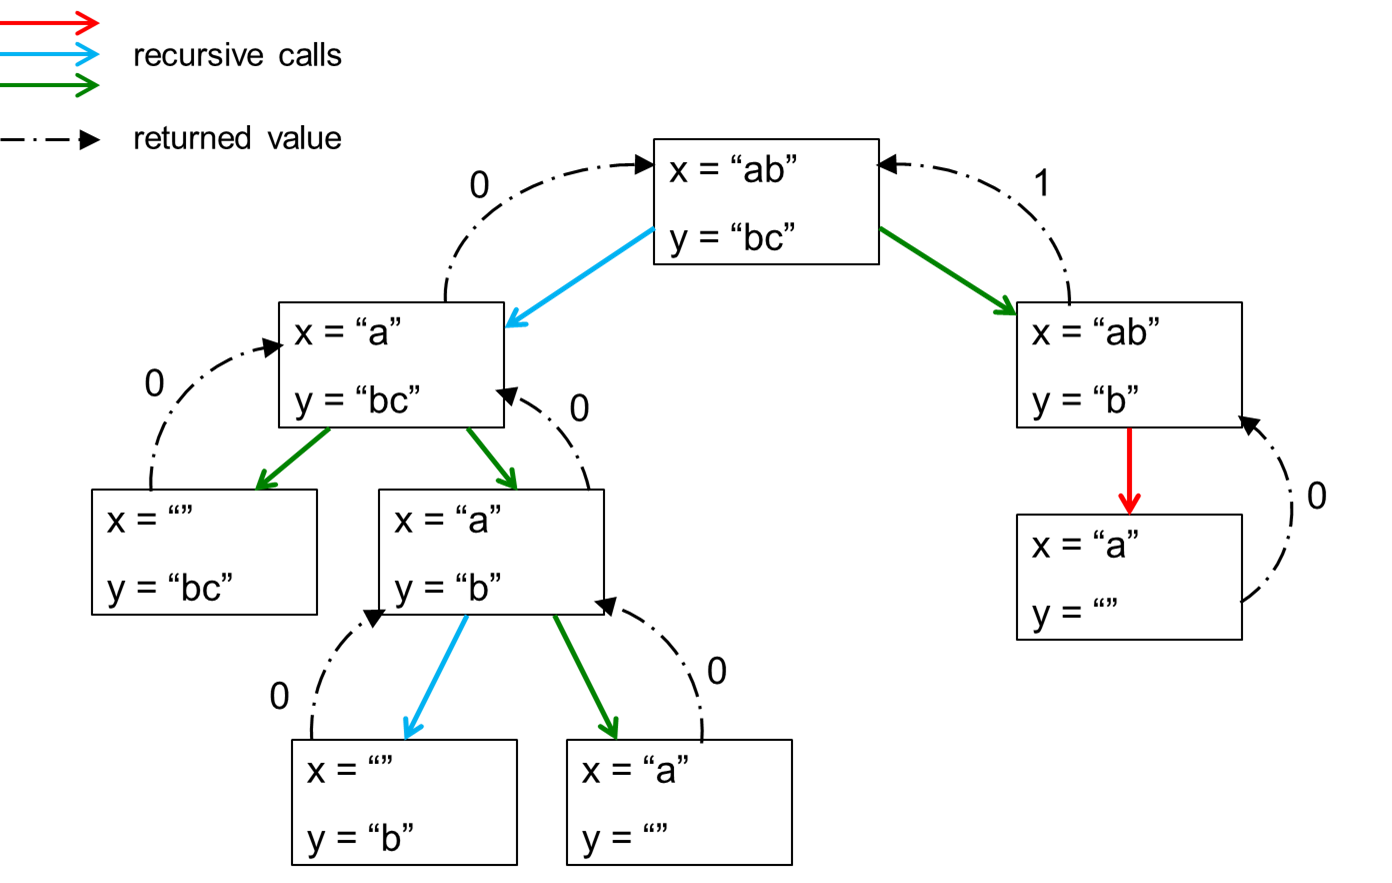

```{admonition} **עיצרו וחישבו:** למה בסוף לא מימשנו את האפשרות השלישית שבה שני התווים האחרונים לא בLCS?
:class: dropdown, caution

הסיבה לכך היא שאפשרות זו נבדקת **בתוך הקריאה הרקורסיבית**. ניתן לראות שהמחרוזות "a" ו"b" נבדקות בתוך הקריאה הרקורסיבית של "a","bc".

```

### מימוש הפתרון בפייתון

ממשו את הפונקציה `lcs_rec` אשר מקבלת שני רצפים `x` ו`y`, ומחזירה את אורך ה-LCS שלהן.
מצורפות לכם מספר מקרי בדיקה.

```{admonition} **שימו לב**
:class: error

על הפונקציה שלכם לעבוד גם על מחרוזות וגם על רשימות.

```

In [ ]:
def lcs_rec(x,y):
    # write your code here
    pass

In [ ]:
lcs_rec("HUMAN","CHIMPANZEE")

In [ ]:
lcs_rec("rykz","rickz")

In [ ]:
lcs_rec(['r','y','k','z'],['r','i','c','k','z'])

In [ ]:
lcs_rec([1,2,3,4,5,6],[7,2,4,9,9,9,6])

In [ ]:
lcs_rec([1,2,3,4,5,6],[6,5,4,3,2,1])

```{admonition} **תזכורת:**  פסאודו-קוד
:class: dropdown, tip

**1.** מצב בסיס (תנאי עצירה):  
   **1.1.** אם אחד מהרצפים (x או y) ריק - החזר שהאורך הוא 0.  

**2.** שלב רקורסיה (פירוק + הרכבה):  
    **2.1** אם last_x == last_y:  
        **2.1.1** LCS = lcs_rec(prefix_x, prefix_y) + 1  
    **2.2** אחרת:  
        **2.2.1** LCS = max(lcs_rec(prefix_x, y), lcs_rec(x, prefix_y))  


```

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python 
def lcs_rec(x,y):
    if len(x) == 0 or len(y) == 0:
        return 0
    if x[-1] == y[-1]:
        return lcs_rec(x[:-1],y[:-1]) + 1
    else:
        return max(lcs_rec(x[:-1],y), lcs_rec(x,y[:-1]))

```

## המנעות משכפול רשימות

נבחן כעת את הפעלת הפונקציה על רשימות של תווים במקום על מחרוזות (שימו לב שמימוש הפונקציה לא השתנה!)   
    
בכל פעם שהפונקציה הרקורסיבית נקראת, מבוצע slicing על הרשימה (שנחתכה), שמועבר לקריאה הרקורסיבית. 
זכרו כי פעולת slicing **משכפלת** את של אותה רשימה. כלומר, בכל קריאה רקורסיבית, יועבר שכפול של הרשימה לscope החדש שנוצר עבור קריאה זו.    

ראו דוגמא להרצת התכנית בPython Tutor:

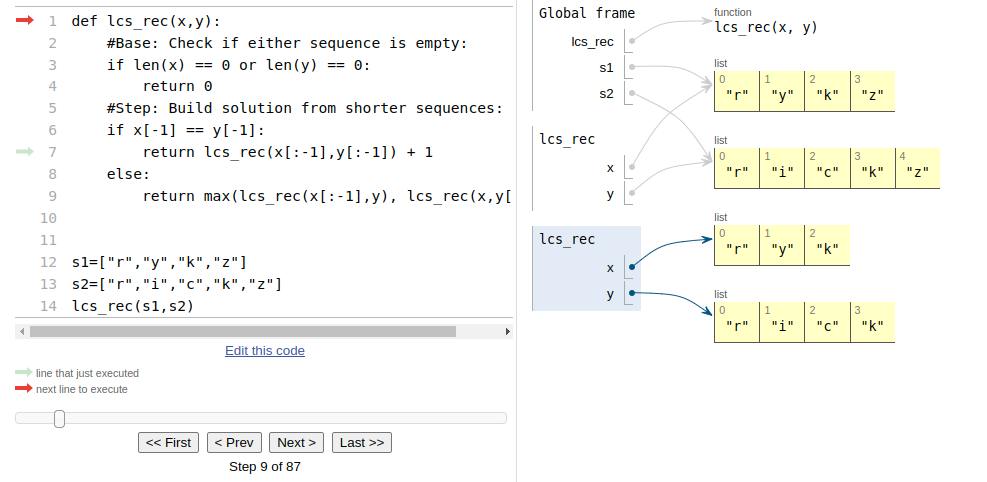

```{admonition} **עיצרו וחישבו:**  באיזה עוד אלגוריתם נתקלתם בslicing מיותר? מה עשינו אז?
:class: dropdown, caution

נתקלנו בבעיה הזו גם במימוש החיפוש הבינארי, וגם אז פתרנו זאת באמצעות שימוש באינדקסים.

```

### פתרון: שימוש באינדקסים במקום slicing

במקום לחתוך את סוף הרשימות ב-slicing, נוסיף בחתימת הפונקציה אינדקסים המייצגים את סוף הרשימה **הנוכחי**, כלומר, לאחר ה"חיתוך".

- בדיקת התו תהיה לפי אינדקסים (ולא התו האחרון ברשימה).
- כל פעולת חיתוך רשימה תוחלף **בהקטנת אינדקס סוף הרשימה** ב1.
- תנאי הבסיס יבדוק את ערך האינדקס במקום גודל הרשימה

ממשו בפייתון את הפונקציה `lcs_rec` אשר מחזירה את אורך ה-LCS בין שני רצפים. הפעם השתמשו ב`x_i`, `y_i` במקום לבצע slicing.

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
def lcs_rec(x,y,x_i,y_i):
    if y_i == -1 or x_i == -1:
        return 0
    if x[x_i] == y[y_i]:
        return lcs_rec(x,y,x_i-1,y_i-1) + 1
    else:
        return max(lcs_rec(x,y,x_i-1,y_i), lcs_rec(x,y,x_i,y_i-1))

```

In [1]:
def lcs_rec(x,y, x_i, y_i):
    # write your code here
    pass

s1=["r","y","k","z"]
s2=["r","i","c","k","z"]
lcs_rec(s1,s2,x_i=len(s1)-1,y_i=len(s2)-1)

כך יראה הזכרון התכנית של המימוש החדש בPython Tutor:

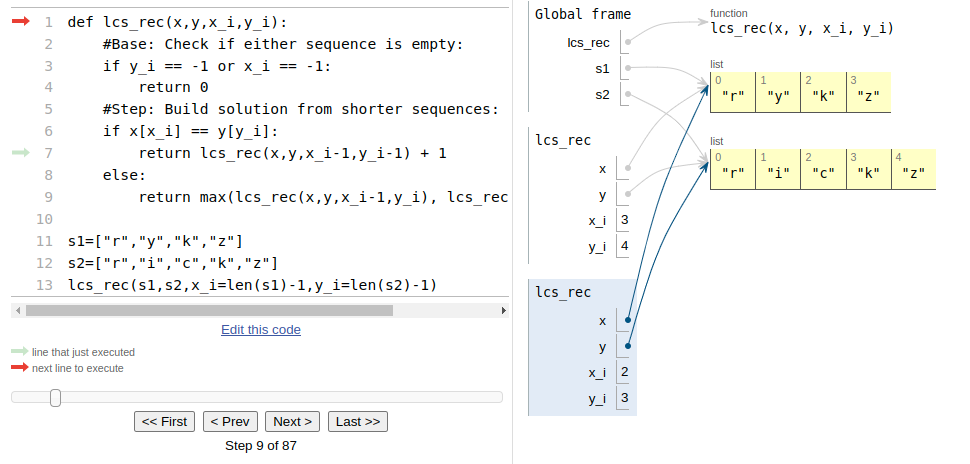

פתרון העברת האינדקסים אמנם חסך לנו slicing מיותר ושימוש בזכרון, אך קיימים לו 2 חסרונות:
- לא תמיד אנו יכולים לשנות חתימת הפונקציה - לדוגמה, אם אנחנו מפתחים בחברה מסוימת, ייתכן שמישהו אחר כבר משתמש בפונקציה הזו, ולהוסיף לה פרמטרים יגרום לקוד שלו לקרוס.
- הקריאה לפונקציה עם הפרמטרים החדשים מעט מסורבלת:
```python
s1=["r","y","k","z"]
s2=["r","i","c","k","z"]
lcs_rec(s1,s2,x_i=len(s1)-1,y_i=len(s2)-1)
```



על מנת לעקוף את הבעיה, ניתן למשתמש **בפונקצית עזר**
- נממש את הפתרון שלנו כולו בפונקצית העזר
- נקרא לפונצית העזר מהפונקציה המקורית עם הפרמטרים הנדרשים

כך אנו למעשה 
- לא משנים את חתימת הפונקציה המקורית
- לא צריכים לחזר עם הקריאה המסורבלת (עם ארבעת הפרמטרים) בכל פעם שנקרא לפונקציה המקורית

In [ ]:
def lcs_rec_helper(x,y,x_i,y_i):
    if y_i == -1 or x_i == -1:
        return 0
    if x[x_i] == y[y_i]:
        return lcs_rec_helper(x,y,x_i-1,y_i-1) + 1
    else:
        return max(lcs_rec_helper(x,y,x_i-1,y_i), lcs_rec_helper(x,y,x_i,y_i-1))

def lcs_rec(s1,s2):
    return lcs_rec_helper(s1,s2,x_i=len(s1)-1,y_i=len(s2)-1)

In [ ]:
lcs_rec(["r","y","k","z"],["r","i","c","k","z"])